In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

pd.options.mode.chained_assignment = None # удалим предупреждения с экрана
pd.set_option('display.float_format', '{:,.2f}'.format) # зададим вывод для чисел с плавающей точкой до двух знаков

In [2]:
# Прочитаем файл с данными и сохраним в таблицу df
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv(r"C:\Users\User\OneDrive\Education\1_Ya_DA\8_1_prefabricated_project\games.csv")

In [3]:
# Выведем первые десять строк на экран
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# Получим общую информацию о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Получим описательную статистику данных таблицы df
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


**Вывод**

В таблице 16715 строк и 11 колонок. Типы данных: object и float64

Количество значений в колонках различается, значит в данных есть пропущенные значения.

Колонка "Year_of_Release" имеет вещественный тип данных.  
Колонка "User_Score" имеет вещественный тип данных.  
Колонки "Year_of_Release" и "Critic_Score" имеют тип данных часло с плавающей точкой.  

## Предобработка данных

- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
  - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
  - Опишите причины, которые могли привести к пропускам;
  - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [6]:
# Выведем на экран названия столбцов таблицы df
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
# Представим названия столбцов в соответствии с хорошим стилем - в нижнем регистре
df.columns = [x.lower() for x in df.columns]

In [8]:
# Проверим
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [9]:
# Проверим таблицу df на количество дубликатов
df.duplicated().sum()

0

In [10]:
# заменим тип данных на datetime
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')

В соответствии с условием задачи, посмотрим на аббревиатуру 'tbd' в столбце с оценкой пользователей ("User_Score"). Разберём это значение.

In [11]:
# Выведем уникальные значения столбца "User_Score"
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Видим, что колонка состоит из значений: число в виде кортежа, tbd, nan 

В Кембриджском словаре значение "tbd" -  to be decided или to be determined, используется, когда что-то еще не решено или еще не известно. Предположу, что пользователями не определён рейтинг для данных игр. Посмотрим, что это за игры.

In [12]:
# Выведем игры на экран
df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010-01-01,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005-01-01,Misc,2.08,1.35,0.00,0.54,61.00,tbd,E10+
520,Zumba Fitness 2,Wii,2011-01-01,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010-01-01,Misc,1.65,0.57,0.00,0.20,71.00,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaT,Adventure,2.15,0.18,0.00,0.07,73.00,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001-01-01,Action,0.01,0.00,0.00,0.00,67.00,tbd,E
16697,Bust-A-Move 3000,GC,2003-01-01,Puzzle,0.01,0.00,0.00,0.00,53.00,tbd,E
16698,Mega Brain Boost,DS,2008-01-01,Puzzle,0.01,0.00,0.00,0.00,48.00,tbd,E
16704,Plushees,DS,2008-01-01,Simulation,0.01,0.00,0.00,0.00,NaN,tbd,E


С значением "tbd", 2424 строки. Изменим данные значения на "nan", изменить на какие-либо числовые значения мы не можем, так как это будет означать, что мы присваиваем рейтинг игре (в диапазоне от 0 до 10).  

Изменим тип данных "кортеж" на числовое значение.

In [13]:
# Изменим tbd на nan
df = df.replace({'user_score': {'tbd': np.nan}})

In [14]:
# Заменим тип данных на числовой
df['user_score'] = pd.to_numeric(df['user_score'])

Проверим

In [15]:
df['user_score'].sort_values().unique()

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

Хорошо. В колонке числовые значения и nan

In [16]:
# Выведем количество пропущенных значений для каждого столбца с сортировкой по убыванию
df.isna().sum().sort_values(ascending=False)

user_score         9125
critic_score       8578
rating             6766
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [17]:
# Посмотрим процент пропусков в столбцах с сортировкой по убыванию
df.isna().mean().sort_values(ascending=False)

user_score        0.55
critic_score      0.51
rating            0.40
year_of_release   0.02
name              0.00
genre             0.00
platform          0.00
na_sales          0.00
eu_sales          0.00
jp_sales          0.00
other_sales       0.00
dtype: float64

В 4-ёх колонках из 11-и пропуски данных.  
Наибольший процент пропусков в колонке "critic_score" - оценка критиков.

Посмотрим пропуски в столбце "genre"

In [18]:
df[df['genre'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993-01-01,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993-01-01,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что аналогичные пропуски в колонках - "name", "critic_score", "user_score", "rating", удалим эти строки, так как они не несут полезной информации

In [19]:
df = df.dropna(subset=['name'])

В столбце "year_of_release", 269 пропущенных значений - это всего лишь 1.61% от данных (16,715), удалим эти строки. Можно было бы взять год релиза из названия игры, но думаю это не самый лучший вариант.

In [20]:
# Удалим строки с пропущенными значениями
df = df.dropna(subset=['year_of_release'])

Изучим данные столбца "rating".

Процесс присвоения рейтингов. ESRB -  основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения.

In [21]:
# Выведем уникальные значения столбца rating
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Виды рейтингов ESRB:

- «EC» («Early childhood») — «Для детей младшего возраста;
- «E» («Everyone») — «Для всех»;
- «E10+» («Everyone 10 and older») — «Для всех старше 10 лет»;
- «T» («Teen») — «Подросткам 13-19 лет»;
- «M» («Mature») — «Для взрослых от 17 лет»;
- «AO» («Adults Only 18+») — «Только для взрослых»;
- «RP» («Rating Pending») — «Рейтинг ожидается».

Ссылка: http://www.gamer.ru/everything/reytingi-esrb-ot-a-do-ya

Нам незнаком рейтинг "К-А" ("Kids to Adults") - "Для детей и взрослых", заменим его на рейтинг "Е" ("«Everyone»") - "Для всех" 

In [22]:
# заменим рейтинг К-А на E
df = df.replace({'rating': {'K-A': 'E'}})

В столбцах "critic_score" и "user_score" пропуски категориальные. В случае, если мы их заполним на ноль, среднюю или медиану, то это будет означать искажение данных рейтинга, чтобы не "портить статистику", заменим значение на "-1".  
В столбце "rating" заменим пропуски на "no_rating".

In [23]:
# Произведем замену методом fillna
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)
df['rating'] = df['rating'].fillna('no_rating')

In [24]:
# Проверим пропущенные значения с примененнием метода сортировки
df.isna().sum().sort_values()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

В колонке "critic_score" представлены целые числа, поэтому заменим тип данных колонки на int

In [25]:
# Сменим тип данных с float64 на int64
df['critic_score'] = df['critic_score'].astype('int64')

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец "total sales by all regions"

In [26]:
# Создадим столбец с суммарными продажами
df['total_sales_by_all_regions'] = df[['na_sales', 
                                        'eu_sales', 
                                        'jp_sales', 
                                        'other_sales']].sum(axis=1)

In [27]:
# Посмотрим результат работы
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales_by_all_regions
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76,8.00,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,-1,-1.00,no_rating,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82,8.30,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.00,no_rating,31.38


Вывод

Привели названия колонок к нижнему регистру.  
Изменили тип данных в годе выпуска, оценке критиков и оценке пользователей.  
Пропуски в оценках и рейтинге были заменены на "-1".  
Удалили две строки с пропущенными значениями.  
Скорректировали значние рейтинга.  
Добавили колонку суммарных продаж.

## Исследовательский анализ данных

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

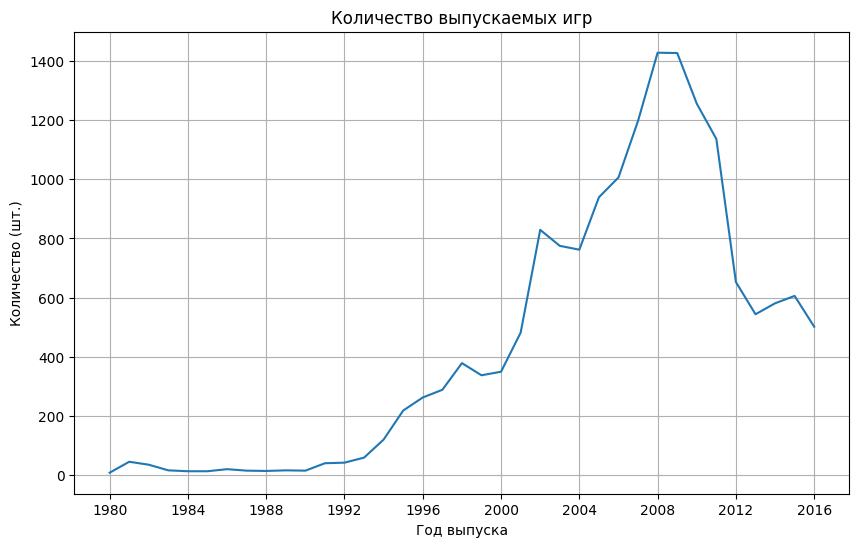

In [28]:
plt.figure(figsize=(10, 6))

plt.plot(df
    .pivot_table(
        index='year_of_release', 
        values='name', 
        aggfunc='count'))

plt.title('Количество выпускаемых игр')
plt.xlabel('Год выпуска')
plt.ylabel('Количество (шт.)')
plt.grid()

In [29]:
(df
    .pivot_table(
        index='year_of_release', 
        values='name', 
        aggfunc='count')
    .sort_values(
        by='name', 
        ascending=False)
    .head(25))


,name
year_of_release,
2008-01-01,1427
2009-01-01,1426
2010-01-01,1255
2007-01-01,1197
2011-01-01,1136
2006-01-01,1006
2005-01-01,939
2002-01-01,829
2003-01-01,775


Видим, что рост продаж начинается с 1993 - 1994 года. Пик выпуска новых игр приходится на 2008, 2009 годы, далее постепенное снижение.

**Посмотрим, как менялись продажи игр по платформам.**

Text(0, 0.5, 'Количество (шт.)')

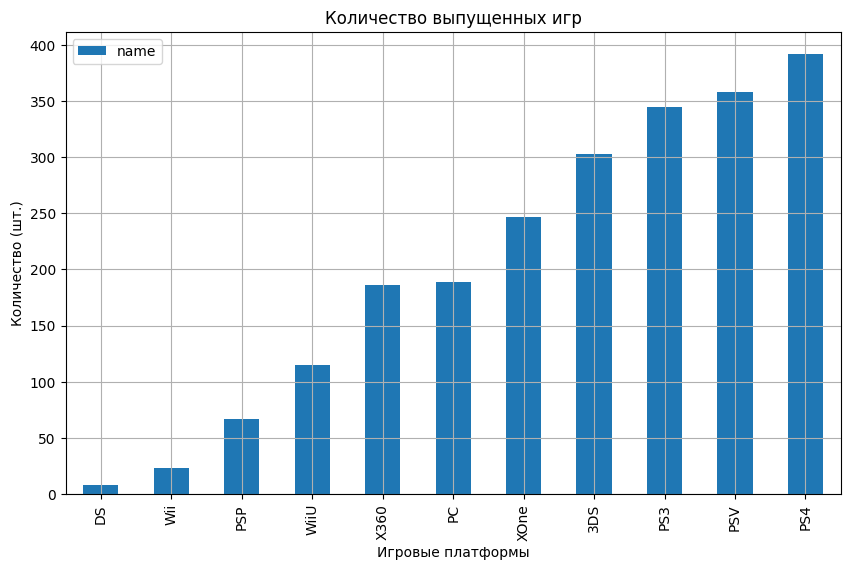

In [30]:
# Построим столбчатую диаграмму и узнаем на какую платформу было выпущенно больше всего игр

(df
    .query('year_of_release > 2012')
    .pivot_table(
        index='platform', 
        values='name', 
        aggfunc='count')
    .reset_index()
    .sort_values(by='name')
    .plot(
        kind='bar', 
        x='platform', 
        y='name', 
        figsize=(10, 6), 
        grid=True))

plt.title('Количество выпущенных игр')
plt.xlabel('Игровые платформы')
plt.ylabel('Количество (шт.)')

Список Топ-5 платформ по количеству игр:

- 1 место - PlayStation 4;
- 2 место - PlayStation Vita;
- 3 место - PlayStation 3.

**Исследуем жизнь каждой платформы из нашего ТОП-списка - как долго она поддерживалась до прихода следующего поколения.**

Для этого построим столбчатую диаграмму и выведем среднее значение для всех платформ, кроме pc, так как в рейтинге pc занимет 6 место и не относится к классу игровых платформ.

In [31]:
# Рассчитаем среднею продолжительнность жизни платформы до появления следующего поколения
the_life_of_the_gaming_platform = (df
    .query('platform != "pc"')
    .pivot_table(index='platform', 
                values='year_of_release', 
                aggfunc=['min', 'max']))

the_life_of_the_gaming_platform.columns = ['min', 'max']
the_life_of_the_gaming_platform['duration'] = \
    the_life_of_the_gaming_platform['max'] - the_life_of_the_gaming_platform['min']

print(f"Средняя продолжительность выпуска платформы (в днях) составляет: \
    {the_life_of_the_gaming_platform['duration'].median()}")
print()
print('Таблица длительности выпуска платформ (в днях):')
the_life_of_the_gaming_platform.sort_values(by='duration', ascending=False)

Средняя продолжительность выпуска платформы (в днях) составляет:     2192 days 00:00:00

Таблица длительности выпуска платформ (в днях):


,min,max,duration
platform,,,
PC,1985-01-01,2016-01-01,11322 days
DS,1985-01-01,2013-01-01,10227 days
GB,1988-01-01,2001-01-01,4749 days
PSP,2004-01-01,2015-01-01,4018 days
PS2,2000-01-01,2011-01-01,4018 days
NES,1983-01-01,1994-01-01,4018 days
X360,2005-01-01,2016-01-01,4017 days
DC,1998-01-01,2008-01-01,3652 days
Wii,2006-01-01,2016-01-01,3652 days


Средняя продолжительнность выпуска игровой приставки составляет 2 191 день или 6 лет.

Актуальный период посчитали с 2013 года (включительно), а планируем на будущий (2017) год. Сейчас 2016 год, изучим какие платформы актуальны сейчас и будут актуальны в будущем до выхода новых консолей следующего поколения.

Список актуальных платформ:

- ps4 дата выхода первой игры: 2013-01-01;
- xone дата выхода первой игры: 2013-01-01;
- wiiu дата выхода первой игры: 2012-01-01;
- 3ds дата выхода первой игры: 2011-01-01;
- psv дата выхода первой игры: 2011-01-01.

С учетом среднего выпуска консолей в 6 лет и периодом от 2013 года включительно, мы охватываем:

- выход 2 консолей нового поколения;
- 1 консоль нового поколения вышла в 2012 году, но и её продажи мы охватываем с 2013 года;
- продажи 2-х конкурентных портативных консолей;

Таким образом, принятый ранее период выбран правильно относительнно нашего исследования.

**Посмотрим, какие платформы лидируют по продажам. Выберием несколько потенциально прибыльных платформ.**


In [32]:
# Сделаем сортировку платформа/выручка с данными от 2012 года
sales_leaders_platforms = (df
    .query('year_of_release > 2012')
    .pivot_table(index='year_of_release', 
                columns='platform', 
                values='total_sales_by_all_regions', 
                aggfunc='sum'))

sales_leaders_platforms

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013-01-01,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014-01-01,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015-01-01,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016-01-01,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Text(0, 0.5, 'Количесво копий (млн. шт.)')

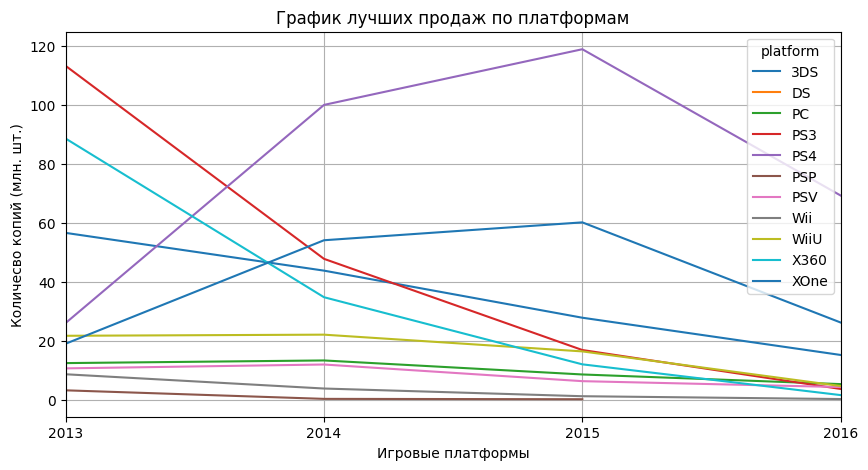

In [33]:
# Построим график платформа/выручка с данными от 2013 года
(df
    .query('year_of_release > 2012')
    .pivot_table(index='year_of_release', 
        columns='platform', 
        values='total_sales_by_all_regions', 
        aggfunc='sum')
    .plot(figsize=(10, 5), 
        grid=True))

plt.title('График лучших продаж по платформам')
plt.xlabel('Игровые платформы')
plt.ylabel('Количесво копий (млн. шт.)')

In [34]:
# Та же информация, что и на графике выше
(df
    .pivot_table(
        index='platform', 
        values='total_sales_by_all_regions', 
        aggfunc='sum')
    .sort_values(
        by='total_sales_by_all_regions', 
        ascending=False).head(10))

,total_sales_by_all_regions
platform,
PS2,"1,233.56"
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Вывод

- Самые популярные игровые платформы за весь период - PS2, X360, PS3, WII, DS, PS.
- 2015 год был пиковым по продажам на многих платформах, далее наблюдается постепенный спад для всех платформ. Возможно, повлияли внешние факторы. Тем не менее, выделим наиболее прибыльные платформы - это PS и Xbox.

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

Используем наиболее актуальный период 2013 - 2016 годы.

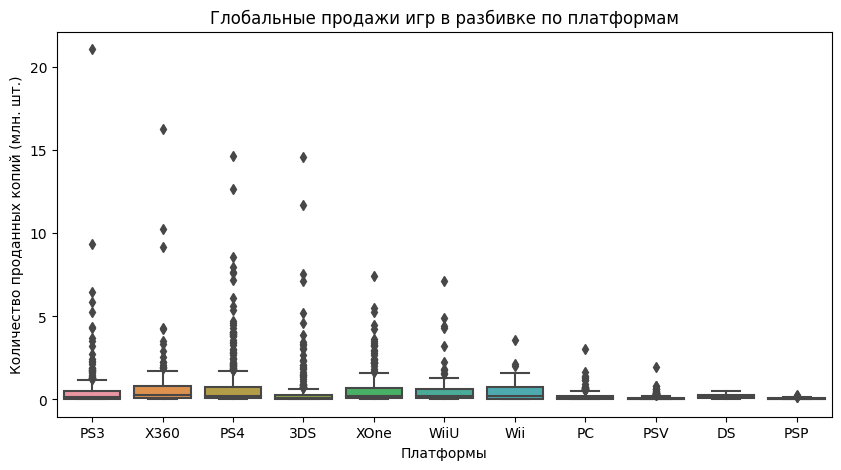

In [35]:
# Построим ящик с усами глобальных продаж по платформам
plt.figure(figsize=(10, 5))

(sns
    .boxplot(
        data=df
    .query('year_of_release > 2012'),
        x='platform',
        y='total_sales_by_all_regions',)
    .set(title='Глобальные продажи игр в разбивке по платформам',
        xlabel='Платформы',
        ylabel='Количество проданных копий (млн. шт.)'))

plt.show()

Вывод

Максимальные продажи:
- 1 место PlayStation 3;
- 2 место Xbox 360;
- 3 место PlayStation 4;
- 4 место Nintendo 3DS.

По выбрасам видно, больше всего аномально больших продаж у топ 3 платформ, возможно это связанно с большим количеством эксклюзивов на эти платформы.

(0.0, 1.8)

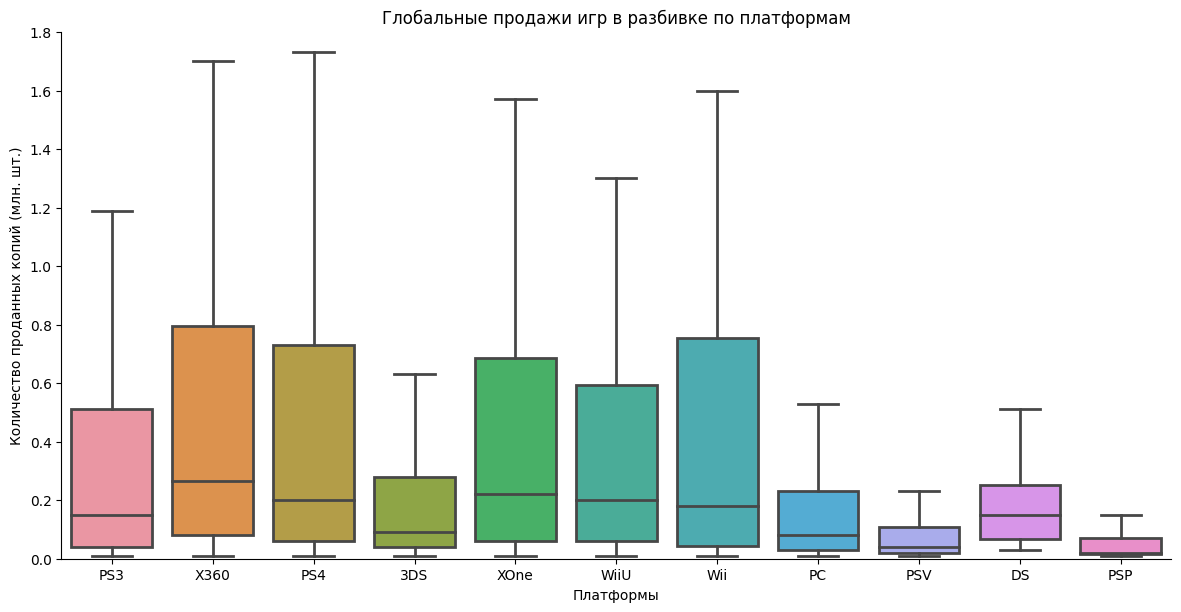

In [36]:
# Построим ящик с усами глобальных продаж по платформам
(sns
    .catplot(
        data=df
    .query('year_of_release > 2012'),
        x='platform',
        y='total_sales_by_all_regions',
        kind='box',
        linewidth=2,
        height=6,
        aspect=2,
        showfliers=False)
    .set(title='Глобальные продажи игр в разбивке по платформам',
        xlabel='Платформы',
        ylabel='Количество проданных копий (млн. шт.)'))

# Установим параметр ylim()
plt.ylim([0, 1.8])

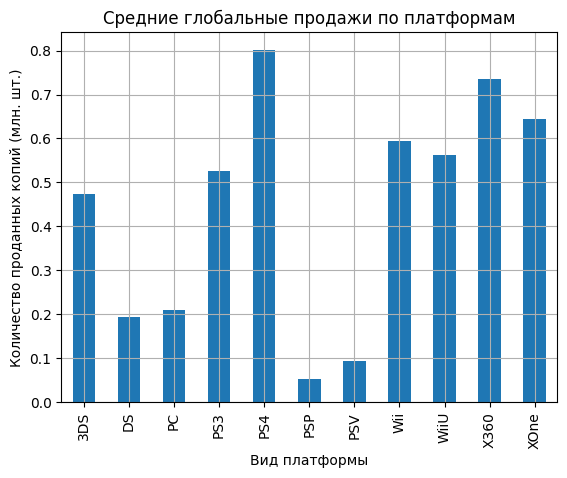

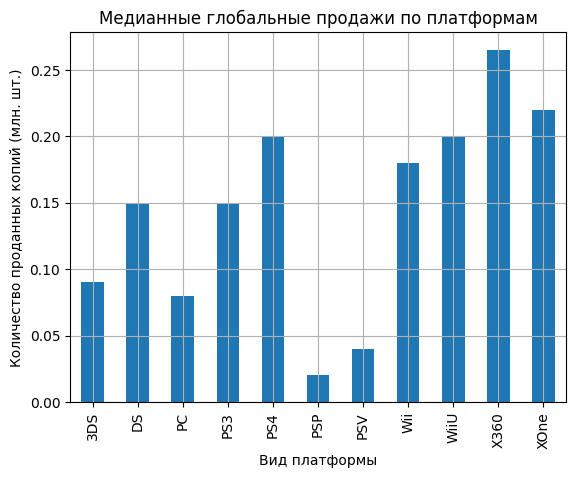

In [37]:
(df
    .query('year_of_release > 2012')
    .pivot_table(
        index='platform',
        values='total_sales_by_all_regions',
        aggfunc='mean')
    .plot(
        kind='bar',
        title='Средние глобальные продажи по платформам',
        xlabel='Вид платформы',
        ylabel='Количество проданных копий (млн. шт.)',
        grid=True))
 
plt.legend().remove()
 
(df
    .query('year_of_release > 2012')
    .pivot_table(
        index='platform',
        values='total_sales_by_all_regions',
        aggfunc='median')
    .plot(
        kind='bar',
        title='Медианные глобальные продажи по платформам',
        xlabel='Вид платформы',
        ylabel='Количество проданных копий (млн. шт.)',
        grid=True))
 
plt.legend().remove()

Лучшие показатели средних и медианных продаж у следующих платформ:

Средние продажи:
- 1 место PlayStation 4
- 2 место Xbox 360;
- 3 место Xbox One;

Медиана продаж:
- 1 место Xbox 360
- 2 место Xbox One
- 3 место PlayStation 4 и Nintendo Wii U

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

Самой популярной платформой из продаваемых в 2016 году, является PS4. Рассмотрим влияние отзывов на её примере.

In [38]:
ps4_critics_review = df.query('platform == "PS4" and critic_score > 0')

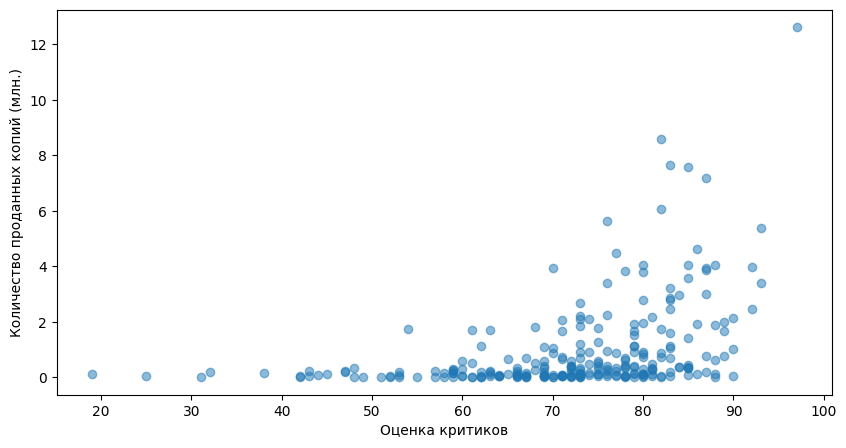

In [39]:
# Построим диаграмму рассеяния между отзывами критиков и продажами
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(
    x=ps4_critics_review['critic_score'], 
    y=ps4_critics_review['total_sales_by_all_regions'], 
    alpha=0.5)
    
plt.xlabel('Оценка критиков')
plt.ylabel('Количество проданных копий (млн.)')

plt.show()

In [40]:
# Посчитаем корреляцию между отзывами критиков и продажами
round(ps4_critics_review['critic_score'].corr(ps4_critics_review['total_sales_by_all_regions']), 2)

0.41

In [41]:
ps4_user_review = df.query('platform == "PS4" and user_score > 0')

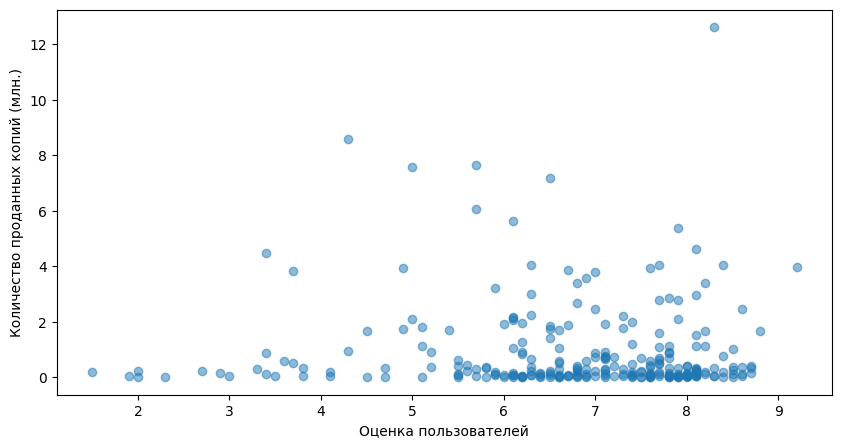

In [42]:
# Построим диаграмму рассеяния между отзывами пользователей и продажами
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(
    x=ps4_user_review['user_score'], 
    y=ps4_user_review['total_sales_by_all_regions'], 
    alpha=0.5)
    
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество проданных копий (млн.)')

plt.show()

In [43]:
# Посчитаем коэффициент корреляции оценки пользователей и продаж
round(ps4_user_review['critic_score'].corr(ps4_user_review['total_sales_by_all_regions']), 2)

0.35

Вывод

- Коэффициент корреляции 0,41 между оценкой критиков и количеством продаж говорит о том, что между ними есть умереренно-слабая зависимость. 
- Коэффициент корреляции 0,35 между оценкой пользователей и количеством продаж говорит о том, что между ними есть слабая зависимость. Можно предположить, что оценка игроков и продажи почти не зависят друг от друга.

**Соотнесите выводы с продажами игр на других платформах.**

In [44]:
# Сделаем цикл с сортировкой релиза от 2012 года. В тело цикла, добавим инструкцию с корреляцией
for x in df.query('year_of_release > 2012')['platform'].unique():
    
    critic = df.query('platform == @x and critic_score > 0')   
    user = df.query('platform == @x and user_score > 0')

    critic_corr = round(critic['critic_score']
        .corr(critic['total_sales_by_all_regions']),2)
    user_corr = round(user['user_score']
        .corr(user['total_sales_by_all_regions']),2)

    print()
    print('Платформа:', x)
    print('Корреляция между отзывами критиков и продажами:', critic_corr)
    print('Корреляция между отзывами игроками и продажами:', user_corr)
    print()


Платформа: PS3
Корреляция между отзывами критиков и продажами: 0.43
Корреляция между отзывами игроками и продажами: 0.13


Платформа: X360
Корреляция между отзывами критиков и продажами: 0.39
Корреляция между отзывами игроками и продажами: 0.11


Платформа: PS4
Корреляция между отзывами критиков и продажами: 0.41
Корреляция между отзывами игроками и продажами: -0.03


Платформа: 3DS
Корреляция между отзывами критиков и продажами: 0.35
Корреляция между отзывами игроками и продажами: 0.22


Платформа: XOne
Корреляция между отзывами критиков и продажами: 0.42
Корреляция между отзывами игроками и продажами: -0.07


Платформа: WiiU
Корреляция между отзывами критиков и продажами: 0.35
Корреляция между отзывами игроками и продажами: 0.4


Платформа: Wii
Корреляция между отзывами критиков и продажами: 0.18
Корреляция между отзывами игроками и продажами: 0.11


Платформа: PC
Корреляция между отзывами критиков и продажами: 0.26
Корреляция между отзывами игроками и продажами: 0.01


Платформа: P

Вывод

- Видим умеренно-слабую корреляцию между отзывами критиков и продажами игр на других платформах. 
- Очень слабая корреляция, между отзывами пользователей и продажами игр. Оценки игроков, практически не влияют на продажи.

**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [45]:
# Посмотрим на сортировку жанров по продажам от большего к меньшему
games_by_genre = (
    df
    .pivot_table(
        index='genre', 
        values='total_sales_by_all_regions', 
        aggfunc='sum')
    .sort_values(by='total_sales_by_all_regions', 
        ascending=False)
)

games_by_genre = (
    games_by_genre
    .reset_index()
    .rename_axis(None, axis=1)
)
    
games_by_genre

,genre,total_sales_by_all_regions
0,Action,"1,716.52"
1,Sports,"1,309.67"
2,Shooter,"1,041.36"
3,Role-Playing,931.08
4,Platform,825.55
5,Misc,790.29
6,Racing,723.49
7,Fighting,442.66
8,Simulation,387.96
9,Puzzle,239.89


Text(0, 0.5, 'Продажи')

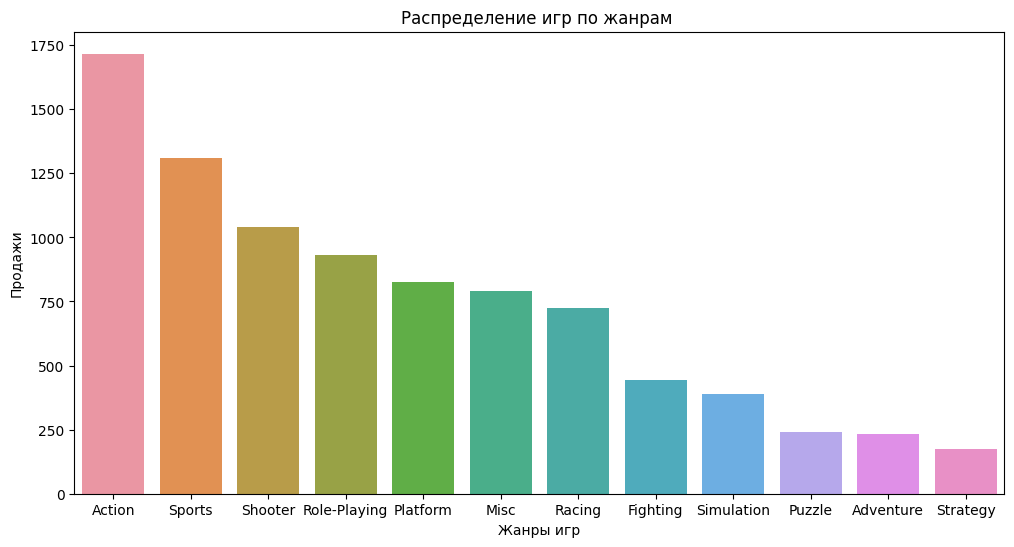

In [46]:
#Используем барплот чтобы наглядно посмотреть рейтинг жанров
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=12)

sns.barplot(
    data=games_by_genre, 
    x='genre', 
    y='total_sales_by_all_regions')

plt.xlabel('Жанры игр', fontsize=10)
plt.ylabel('Продажи', fontsize=10)

Вывод

Самое большое количество проданных игр в миллионах копий приходится на жанры:
1. Action - 1,750 шт.;
2. Sports - 1,500 шт.;
3. Shooter - 1,250 шт.

In [47]:
# Выведем статистику среднего значения с сортировкой
games_by_genre_mean = (
    df
    .pivot_table(
        index='genre', 
        values='total_sales_by_all_regions', 
        aggfunc='mean')
    .sort_values(by='total_sales_by_all_regions', 
        ascending=False)
)

games_by_genre_mean = (
    games_by_genre_mean
    .reset_index()
    .rename_axis(None, axis=1)
)
    
games_by_genre_mean

,genre,total_sales_by_all_regions
0,Platform,0.94
1,Shooter,0.80
2,Role-Playing,0.63
3,Racing,0.59
4,Sports,0.57
5,Fighting,0.53
6,Action,0.52
7,Misc,0.46
8,Simulation,0.45
9,Puzzle,0.42


Text(0, 0.5, 'Продажи')

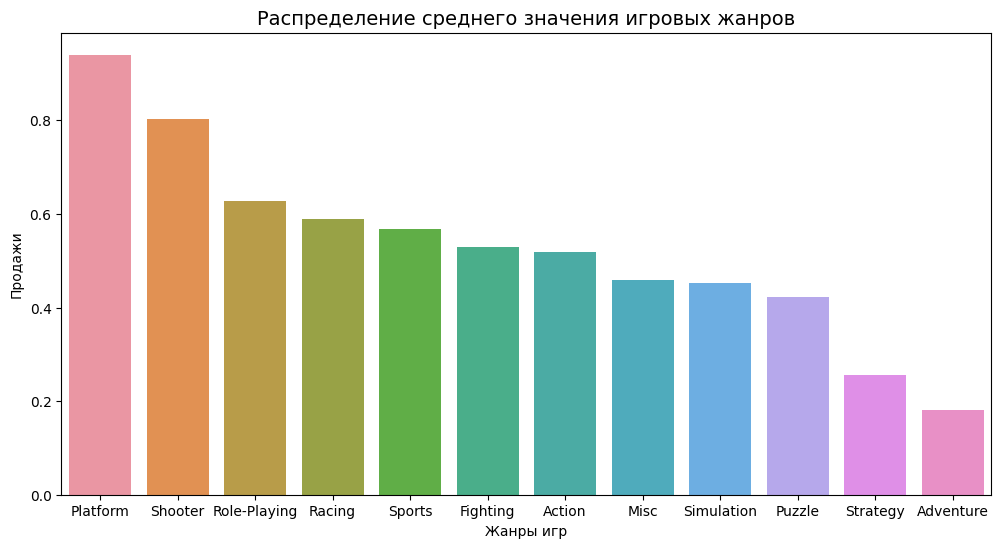

In [48]:
# Выведем график среднего значения
plt.figure(figsize=(12,6))
plt.title('Распределение среднего значения игровых жанров', fontsize=14)

sns.barplot(
    data=games_by_genre_mean, 
    x='genre', 
    y='total_sales_by_all_regions')
    
plt.xlabel('Жанры игр', fontsize=10)
plt.ylabel('Продажи', fontsize=10)

In [49]:
# Выведем статистику медианного значения с сортировкой
games_by_genre_median = (
    df
    .pivot_table(
        index='genre', 
        values='total_sales_by_all_regions', 
        aggfunc='median')
    .sort_values(by='total_sales_by_all_regions', 
        ascending=False)
)

games_by_genre_median = (
    games_by_genre_median
    .reset_index()
    .rename_axis(None, axis=1)
)
    
games_by_genre_median

,genre,total_sales_by_all_regions
0,Platform,0.27
1,Shooter,0.24
2,Sports,0.22
3,Fighting,0.21
4,Action,0.19
5,Racing,0.19
6,Role-Playing,0.18
7,Misc,0.16
8,Simulation,0.15
9,Puzzle,0.10


Text(0, 0.5, 'Продажи')

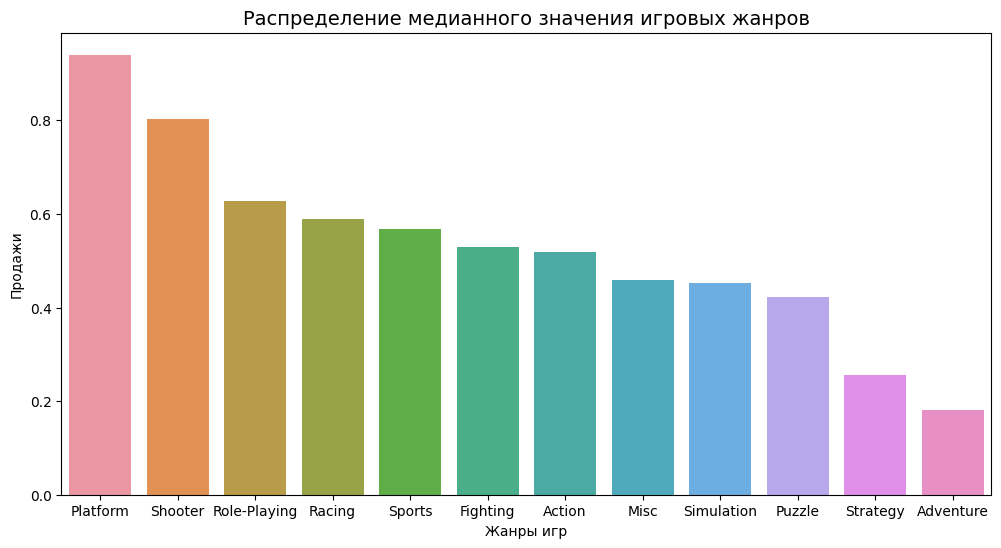

In [50]:
# Выведем график медианного значения
plt.figure(figsize=(12,6))
plt.title('Распределение медианного значения игровых жанров', fontsize=14)

sns.barplot(
    data=games_by_genre_mean, 
    x='genre', 
    y='total_sales_by_all_regions')

plt.xlabel('Жанры игр', fontsize=10)
plt.ylabel('Продажи', fontsize=10)

In [51]:
# Сохраним в переменной the_best_genres_5 топ 5 жанров
the_best_genres_5 = df[df['genre'].isin(['Platform', 
                                        'Shooter', 
                                        'Role-Playing', 
                                        'Racing', 
                                        'Sports'])]
                                        
the_best_genres_5['total_sales_by_all_regions'].describe()

count   7,187.00
mean        0.67
std         1.98
min         0.00
25%         0.08
50%         0.21
75%         0.59
max        82.54
Name: total_sales_by_all_regions, dtype: float64

In [52]:
# Отфильтруем выбросы для ящика с усами
the_best_genres_5 = the_best_genres_5.query('total_sales_by_all_regions < 1.4')
the_best_genres_5['total_sales_by_all_regions'].describe()

count   6,426.00
mean        0.30
std         0.32
min         0.00
25%         0.07
50%         0.17
75%         0.42
max         1.39
Name: total_sales_by_all_regions, dtype: float64

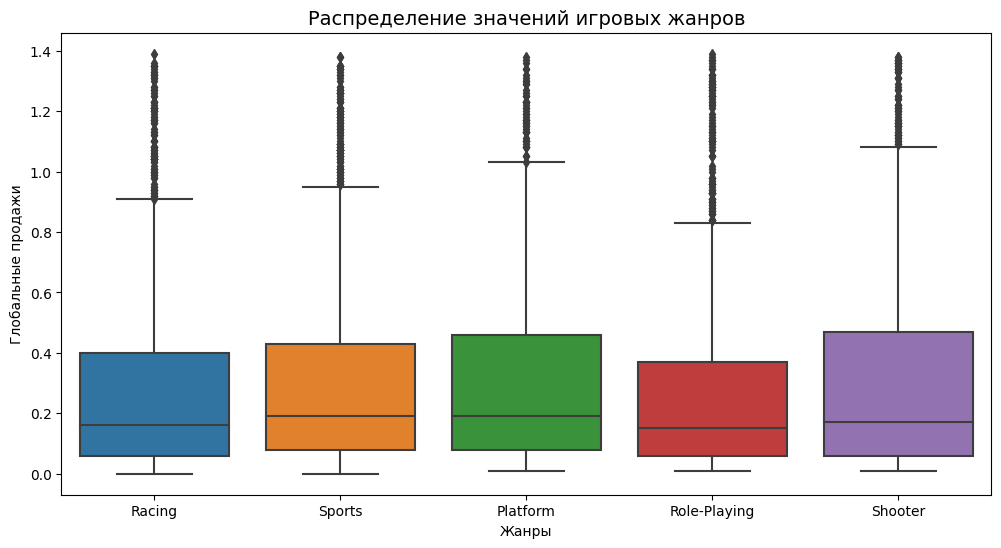

In [53]:
#Ещё раз построим ящики с усами 
plt.figure(figsize=(12,6))
plt.title('Распределение значений игровых жанров', fontsize=14)

sns.boxplot(
    data=the_best_genres_5, 
    x='genre', 
    y='total_sales_by_all_regions')

plt.xlabel('Жанры', fontsize=10)
plt.ylabel('Глобальные продажи', fontsize=10);

Вывод

Удалив выбросы, видим наглядно, занимаемые места в рейтинге популярных жанров:
1. "Shooter";
2. "Platform";
3. "Sports";
4. "Racing"; 
5. "Role-Plaing".

Медианные и средние значения показали, что наиболее стабильные показатели у жанров "Shooter", "Platform", "Sports". Видим, что эти три жанра приносят стабильно высокий доход. 


Самые слабые показатели по суммарному, среднему, медианному распределениям у жанров:
- "Adventure";
- "Strategy";
- "Puzzle".


## Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишем различия в долях продаж.
- Самые популярные жанры (топ-5). Поясним разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Исследуем портреты пользователей за период 2013 - 2016 год, так как технологии усовершенствуются быстрыми темпами в игровой индустрии и предпочтения потребителей меняются быстро.

**Самые популярные платформы (топ-5)**

In [54]:
na_popular_platforms = (
    df
    .query('year_of_release > 2012')
    .groupby('platform', as_index=False)['na_sales']
    .sum()
    .nlargest(5, 'na_sales')
)

eu_popular_platforms = (
    df
    .query('year_of_release > 2012')
    .groupby('platform', as_index=False)['eu_sales']
    .sum()
    .nlargest(5, 'eu_sales')
)

jp_popular_platforms = (
    df
    .query('year_of_release > 2012')
    .groupby('platform', as_index=False)['jp_sales']
    .sum()
    .nlargest(5, 'jp_sales')
)

<AxesSubplot: title={'center': 'Продажи платформ в Японии'}>

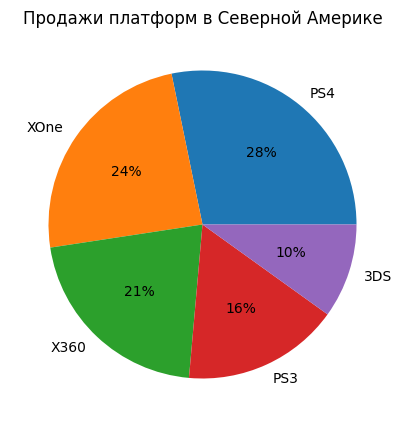

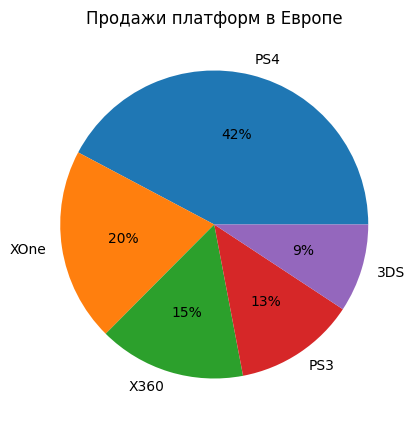

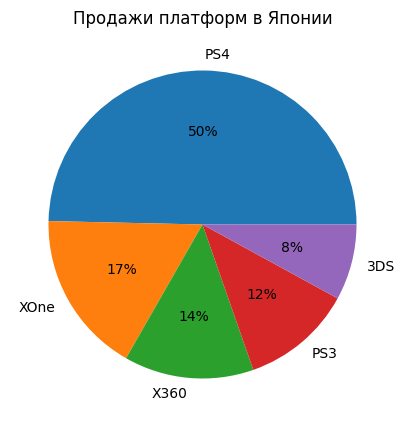

In [55]:
na_popular_platforms.plot(
    kind='pie', 
    y='na_sales', 
    autopct='%1.0f%%', 
    legend=False, 
    labels=na_popular_platforms['platform'],
    title='Продажи платформ в Северной Америке',
    figsize=(5, 5),
    ylabel='')

eu_popular_platforms.plot(
    kind='pie', 
    y='eu_sales', 
    autopct='%1.0f%%', 
    legend=False, 
    labels=na_popular_platforms['platform'],
    title='Продажи платформ в Европе',
    figsize=(5, 5),
    ylabel='')

jp_popular_platforms.plot(
    kind='pie', 
    y='jp_sales', 
    autopct='%1.0f%%', 
    legend=False, 
    labels=na_popular_platforms['platform'],
    title='Продажи платформ в Японии',
    figsize=(5, 5),
    ylabel='')


Вывод

Самой популярной игровой платформой во всех 3 регионах является PS4.  
В Северной Америке на её долю приходится 28%, в Европе 42%, в Японии 50%. Похоже, что распределение связано со страной происхождения платформы которые представлены двумя странами - США и Япония и лояльностью потребителей к "своим" платформам.  
В Японии большую долю занимают Sony(PS3,PS4), Nintendo(3DS) - 70% рынка, а Microsoft(X360, XOne) - 30% рынка. В то время как в Северной Америке доля рынка Microsoft(X360, XOne) - 45% рынка, а Sony(PS3,PS4), Nintendo(3DS) - 54% рынка.  
Европейский рынок, по показателям, ближе к Японскому рынку чем к Американскому.

**Самые популярные жанры (топ-5)**

In [56]:
na_popular_genres = (
    df
    .query('year_of_release > 2012')
    .groupby('genre', as_index=False)['na_sales']
    .sum()
    .nlargest(5, 'na_sales')
)

eu_popular_genres = (
    df
    .query('year_of_release > 2012')
    .groupby('genre', as_index=False)['eu_sales']
    .sum()
    .nlargest(5, 'eu_sales')
)

jp_popular_genres = (
    df
    .query('year_of_release > 2012')
    .groupby('genre', as_index=False)['jp_sales']
    .sum()
    .nlargest(5, 'jp_sales')
)

<AxesSubplot: title={'center': 'Популярные жанры в Японии'}>

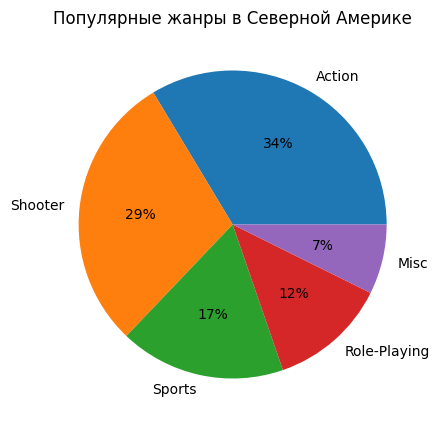

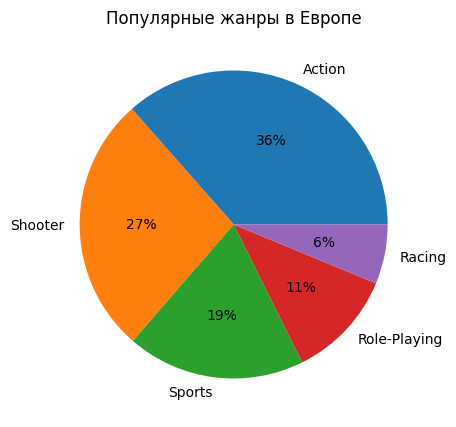

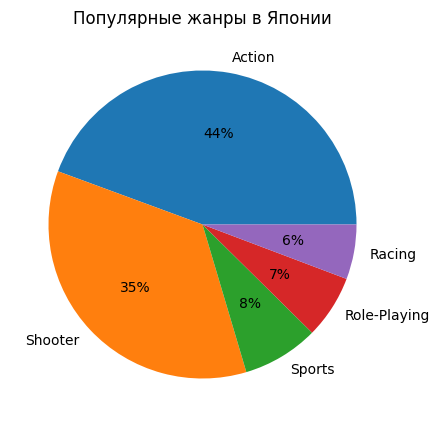

In [57]:
na_popular_genres.plot(
    kind='pie', 
    y='na_sales', 
    autopct='%1.0f%%', 
    legend=False, 
    labels=na_popular_genres['genre'],
    title='Популярные жанры в Северной Америке',
    figsize=(5, 5),
    ylabel='')

eu_popular_genres.plot(
    kind='pie', 
    y='eu_sales', 
    autopct='%1.0f%%', 
    legend=False, 
    labels=eu_popular_genres['genre'],
    title='Популярные жанры в Европе',
    figsize=(5, 5),
    ylabel='')

jp_popular_genres.plot(
    kind='pie', 
    y='jp_sales', 
    autopct='%1.0f%%', 
    legend=False, 
    labels=eu_popular_genres['genre'],
    title='Популярные жанры в Японии',
    figsize=(5, 5),
    ylabel='')

Вывод

Северная Америка и Европа, почти похожи по жанровым предпочтениям. На первом месте жанр - Action с 34% и 36%, на втором месте, жанр - Shooter с 29% и 27%, на третьем месте, жанр - Sports с 17% и 19%.  
В Японии наиболее популярны жанры - Action и Shooter с 44% и 35% соответственно, жанр - Sports на третьем месте с 8%.

**Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе**

In [58]:
na_rating_on_sales = (
    df
    .query('year_of_release > 2012')
    .groupby('rating', as_index=False)['na_sales']
    .sum()
)

eu_rating_on_sales = (
    df
    .query('year_of_release > 2012')
    .groupby('rating', as_index=False)['eu_sales']
    .sum()
)

jp_rating_on_sales = (
    df
    .query('year_of_release > 2012')
    .groupby('rating', as_index=False)['jp_sales']
    .sum()
)

<AxesSubplot: title={'center': 'Влияение рейтинга ESRB на продажи в Японии'}>

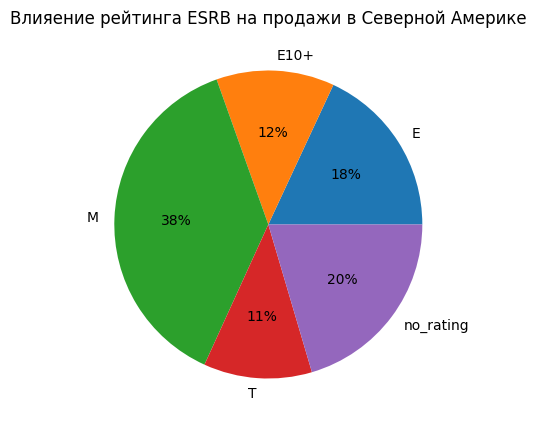

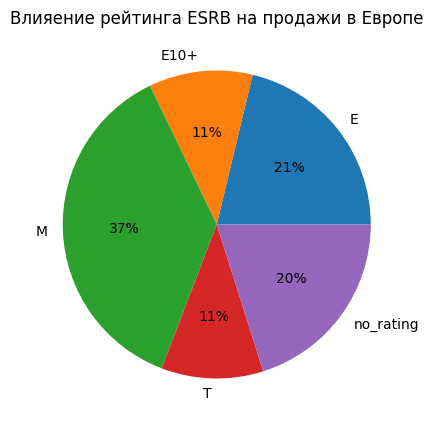

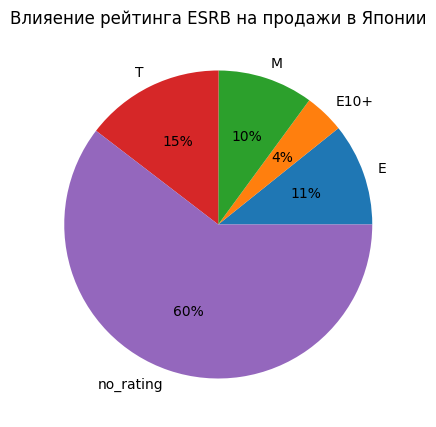

In [59]:
na_rating_on_sales.plot(
    kind='pie', 
    y='na_sales', 
    autopct='%1.0f%%', 
    legend=False, 
    labels=na_rating_on_sales['rating'],
    title='Влияение рейтинга ESRB на продажи в Северной Америке',
    figsize=(5, 5),
    ylabel='')

eu_rating_on_sales.plot(
    kind='pie', 
    y='eu_sales', 
    autopct='%1.0f%%', 
    legend=False, 
    labels=na_rating_on_sales['rating'],
    title='Влияение рейтинга ESRB на продажи в Европе',
    figsize=(5, 5),
    ylabel='')

jp_rating_on_sales.plot(
    kind='pie', 
    y='jp_sales', 
    autopct='%1.0f%%', 
    legend=False, 
    labels=na_rating_on_sales['rating'],
    title='Влияение рейтинга ESRB на продажи в Японии',
    figsize=(5, 5),
    ylabel='')

Вывод

Entertainment Software Rating Board:
- «E» («Everyone») — «Для всех»;
- «E10+» («Everyone 10 and older») — «Для всех старше 10 лет»;
- «T» («Teen») — «Подросткам 13-19 лет»;
- «M» («Mature») — «Для взрослых от 17 лет».

Доля рейтингов Европы и Северной Америки почти совпадает. На первом месте рейтинг «M». Проекты с данным рейтингом могут содержать сцены насилия, крови, непристойные сексуальные сцены, грубую ненормативную лексику.

В Японии на первом месте игры без рейтинга, так как данный рейтинг актуален для Северной Америки и Европы. На втором месте рейтинг "Т", на третьем месте рейтинг "М".

## Проверка гипотез

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Зададим пороговое значение alpha.

**Нулевая гипотеза H₀: средние пользовательские рейтинги платформ Xbox One и PC одинаковые**  
**Альтернативная гипотеза H₁: средние пользовательские рейтинги платформ Xbox One и PC разные**

In [60]:
# Зададим две выборки для Xbox One и PC
x_one = df.query('platform == "XOne" and user_score > 0')
pc = df.query('platform == "PC" and user_score > 0')

In [61]:
# Посмотрим на сравниваемые средние
print('Средний пользовательский рейтинг Xbox One:', x_one['user_score'].mean())
print('Средний пользовательский рейтинг PC:', pc['user_score'].mean())

Средний пользовательский рейтинг Xbox One: 6.52142857142857
Средний пользовательский рейтинг PC: 7.065960264900677


In [62]:
# Установим уровень значимости α = 5% как общепринятое пороговое значение
alpha = .05

results = st.ttest_ind(x_one['user_score'], pc['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.5385802963771835e-06
Отвергаем нулевую гипотезу


**Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые**  
**Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports разные**

In [63]:
# Зададим две выборки для Action и Sports
action = df.query('genre == "Action" and user_score > 0')
sports = df.query('genre == "Sports" and user_score > 0')

In [64]:
# Посмотрим на сравниваемые средние
print('Средний пользовательский рейтинг жанра "Action":', action['user_score'].mean())
print('Средний пользовательский рейтинг жанра "Sports":', sports['user_score'].mean())

Средний пользовательский рейтинг жанра "Action": 7.058129175946543
Средний пользовательский рейтинг жанра "Sports": 6.951433857539316


In [65]:
# Установим уровень значимости α = 5% как общепринятое пороговое значение
alpha = .05

results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.07370217419278526
Не получилось отвергнуть нулевую гипотезу


Вывод

Подтвердили гипотезу: средние пользовательские рейтинги платформ Xbox One и PC разные  
Опровергли гипотезу: средние пользовательские рейтинги жанров Action и Sports одинаковые

## Общий вывод

Исследованы данные выпуска и продажи игр за период 1980 - 2016 годы. Пик выпуска и продаж игр приходится на 2008 и 2009 годы. Далее, с появлением и развитием мобильных игр происходит снижение выпуска и продаж консольных игр.

Самыми продаваемыми игровыми платформами за исследуемый период являются PS2, X360, PS3, Wii, на смену которым пришли обновленные платформы.

Средняя продолжительность жизни игровой платформы 6 лет. Жизнеспособными на 2016 год осталось 9 платформ. Из которых на три платформы (PS, Xbox, Nintendo) приходится более 80% продаж.

Самыми продаваемыми, являются игры жанров Action, Shoote, Sports.

На продажи игр в умеренной степени влияют оценки критиков и почти не влияют оценки игроков.

При планировании продаж на 2017 год, нужно ориентироваться на игровые платформы PS4 и XOne как самые молодые и технологически развитые платформы, находящиеся в середине своего жизненного цикла.

Для потребителей Японского рынка наиболее актуальна продукция Sony(PS) и Nintendo(Wii), для Северной Америки Microsoft(Xbox), Европейский рынок больше склонен к продукции PS.

Медианные и средние значения показали, что наиболее стабильные показатели у жанров "Shooter", "Platform", "Sports", эти три жанра приносят стабильно высокий доход.

Предположу, что с 2016-го года можно ожидать двух-кратное падение продаж, поскольку выпуск новых игр и их продажи начинают снижаться уже с 2015-го года.